In [30]:
#combining all code into one cell
import torch
import torch.nn as nn
import torch.nn.functional as F
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
import numpy as np

# Set manual seed
torch.manual_seed(41)

# Load dataset, replace class names with integers
iris = fetch_ucirepo(id=53)
X = iris.data.features
y = iris.data.targets.replace({
    'class': {
        'Iris-setosa': 0,
        'Iris-versicolor': 1,
        'Iris-virginica': 2
    }
})

# Split dataset into training and test sets
# Note: X and y are pandas DataFrames/Series, so we need to convert them to numpy arrays
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

# Convert to tensors
X_train = torch.FloatTensor(X_train.values)
X_test = torch.FloatTensor(X_test.values)
y_train = torch.LongTensor(np.array(y_train).squeeze())
y_test = torch.LongTensor(np.array(y_test).squeeze())

# Define model class
class Model(nn.Module):
    def __init__(self, input_features=4, h1=8, h2=8, output_features=3):
        super().__init__()
        self.fc1 = nn.Linear(input_features, h1)
        self.fc2 = nn.Linear(h1, h2)
        self.out = nn.Linear(h2, output_features)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return self.out(x)

# Initialize model, loss, and optimizer
model = Model()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Training loop
model.train()
epochs = 100
losses = []

for i in range(epochs):
    y_pred = model(X_train)
    loss = criterion(y_pred, y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses.append(loss.item())
    
    if i % 10 == 0:
        print(f"Epoch {i}, Loss: {loss.item()}")

# Check gradients
print("\nfc1 weight gradients:\n", model.fc1.weight.grad)



Epoch 0, Loss: 1.1318050622940063
Epoch 10, Loss: 0.9658582210540771
Epoch 20, Loss: 0.6791526675224304
Epoch 30, Loss: 0.40087202191352844
Epoch 40, Loss: 0.22570069134235382
Epoch 50, Loss: 0.12255843728780746
Epoch 60, Loss: 0.07509136945009232
Epoch 70, Loss: 0.05467577278614044
Epoch 80, Loss: 0.044483862817287445
Epoch 90, Loss: 0.03846165910363197

fc1 weight gradients:
 tensor([[ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00],
        [-3.4776e-03,  7.0710e-04, -3.4693e-03, -5.1956e-03],
        [ 4.5421e-05, -2.8397e-03,  8.4117e-04,  5.8158e-03],
        [ 7.8118e-04, -3.5647e-03,  1.6814e-03,  8.5225e-03],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00],
        [-1.8375e-03, -4.7147e-03, -4.2261e-04,  8.2311e-03],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00]])


/var/folders/tv/l68gvpr530b23whvlxhdx5ww0000gn/T/ipykernel_44467/2870300992.py:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = iris.data.targets.replace({


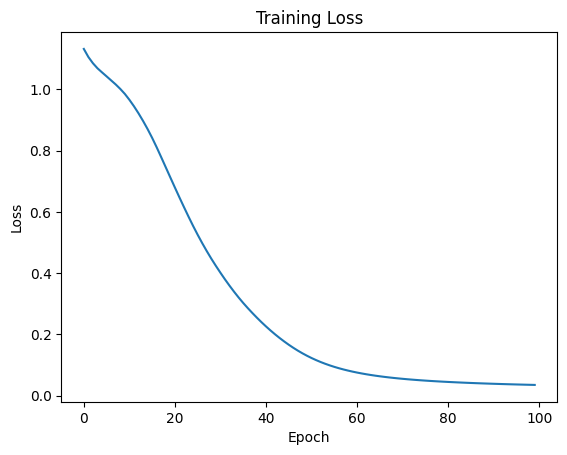

In [31]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()


In [32]:
print((model(X_test)))

tensor([[ -7.7132,   1.5807,   4.8588],
        [-10.2249,   0.5155,   8.7638],
        [-10.7185,   1.1882,   8.2269],
        [ -4.4690,   3.5339,  -1.1210],
        [ -9.0873,   1.4669,   6.2793],
        [ -2.2770,   3.7022,  -4.1140],
        [ -7.0673,   2.2028,   3.2917],
        [ -4.2226,   3.6468,  -1.5420],
        [ -8.0634,   1.8251,   4.7820],
        [-10.8515,   0.5058,   9.3629],
        [ -6.8611,   2.2126,   3.0811],
        [  9.4301,   3.2669, -18.8494],
        [  8.5966,   2.9338, -17.1305],
        [ -1.0571,   3.1664,  -4.7063],
        [  8.0257,   3.2468, -16.7651],
        [ -6.7032,   2.4148,   2.6586],
        [  8.4607,   3.0915, -17.1118],
        [ -7.5983,   1.7014,   4.5610],
        [  9.0443,   3.1470, -18.0944],
        [  7.7209,   2.9005, -15.7171],
        [ -1.6889,   3.3903,  -4.2968],
        [-10.0090,   1.0498,   7.7576],
        [  8.2616,   3.2254, -17.0361],
        [  9.2014,   3.0883, -18.2702],
        [ -1.3313,   3.4926,  -4.9621],


In [33]:
# softmax = nn.Softmax(dim=1)
# predictions = softmax(model(X_test))
# print(predictions)
normalized = torch.nn.functional.softmax(model(X_test), dim=1)
#print(normalized)

#round data (show only first 4 decimal points)
normalized_np = normalized.detach().cpu().numpy()
rounded = np.round(normalized_np, 4)
np.set_printoptions(precision=4, suppress=True)
print(rounded)

[[0.     0.0363 0.9637]
 [0.     0.0003 0.9997]
 [0.     0.0009 0.9991]
 [0.0003 0.9902 0.0094]
 [0.     0.0081 0.9919]
 [0.0025 0.9971 0.0004]
 [0.     0.2518 0.7482]
 [0.0004 0.9941 0.0055]
 [0.     0.0494 0.9506]
 [0.     0.0001 0.9999]
 [0.     0.2956 0.7044]
 [0.9979 0.0021 0.    ]
 [0.9965 0.0035 0.    ]
 [0.0144 0.9852 0.0004]
 [0.9917 0.0083 0.    ]
 [0.     0.4393 0.5606]
 [0.9954 0.0046 0.    ]
 [0.     0.0542 0.9458]
 [0.9973 0.0027 0.    ]
 [0.992  0.008  0.    ]
 [0.0062 0.9934 0.0005]
 [0.     0.0012 0.9988]
 [0.9935 0.0065 0.    ]
 [0.9978 0.0022 0.    ]
 [0.008  0.9918 0.0002]
 [0.0024 0.9969 0.0007]
 [0.0002 0.9891 0.0107]
 [0.003  0.9964 0.0006]
 [0.998  0.002  0.    ]
 [0.0003 0.9668 0.0329]]


In [34]:
# Evaluate the model on Test Data Set
with torch.no_grad(): #turn off backpropagation
    #y_eval will be the predicted labels for the test data
    y_eval = model.forward(X_test) #X_test are features of test data
    loss = criterion(y_eval, y_test) #y_test are the actual labels of test data

print(f'Test Loss: {loss.item()}')


Test Loss: 0.14575907588005066


In [35]:
#seeing how many predictions were correct
correct = 0
with torch.no_grad():
    for i, data in enumerate(X_test):
        if data.ndim == 1:
            data = data.unsqueeze(0)
        #get the predicted value
        y_val = model.forward(data)
        normalized = torch.nn.functional.softmax(y_val, dim=1)


        #round data (show only first 4 decimal points)
        normalized_np = normalized.detach().cpu().numpy()
        rounded = np.round(normalized_np, 4)
        np.set_printoptions(precision=4, suppress=True)
        print(f'{i+1}.) {rounded} \t {y_test[i]}')


        #check if correct or not
        if y_val.argmax().item() == y_test[i]:
            correct += 1

print(f'Number of correct predictions: {correct} out of {len(y_test)}')

1.) [[0.     0.0363 0.9637]] 	 2
2.) [[0.     0.0003 0.9997]] 	 2
3.) [[0.     0.0009 0.9991]] 	 2
4.) [[0.0003 0.9902 0.0094]] 	 1
5.) [[0.     0.0081 0.9919]] 	 2
6.) [[0.0025 0.9971 0.0004]] 	 1
7.) [[0.     0.2518 0.7482]] 	 2
8.) [[0.0004 0.9941 0.0055]] 	 1
9.) [[0.     0.0494 0.9506]] 	 2
10.) [[0.     0.0001 0.9999]] 	 2
11.) [[0.     0.2956 0.7044]] 	 2
12.) [[0.9979 0.0021 0.    ]] 	 0
13.) [[0.9965 0.0035 0.    ]] 	 0
14.) [[0.0144 0.9852 0.0004]] 	 1
15.) [[0.9917 0.0083 0.    ]] 	 0
16.) [[0.     0.4393 0.5606]] 	 2
17.) [[0.9954 0.0046 0.    ]] 	 0
18.) [[0.     0.0542 0.9458]] 	 1
19.) [[0.9973 0.0027 0.    ]] 	 0
20.) [[0.992 0.008 0.   ]] 	 0
21.) [[0.0062 0.9934 0.0005]] 	 1
22.) [[0.     0.0012 0.9988]] 	 2
23.) [[0.9935 0.0065 0.    ]] 	 0
24.) [[0.9978 0.0022 0.    ]] 	 0
25.) [[0.008  0.9918 0.0002]] 	 1
26.) [[0.0024 0.9969 0.0007]] 	 1
27.) [[0.0002 0.9891 0.0107]] 	 1
28.) [[0.003  0.9964 0.0006]] 	 1
29.) [[0.998 0.002 0.   ]] 	 0
30.) [[0.0003 0.9668 0.0329]]

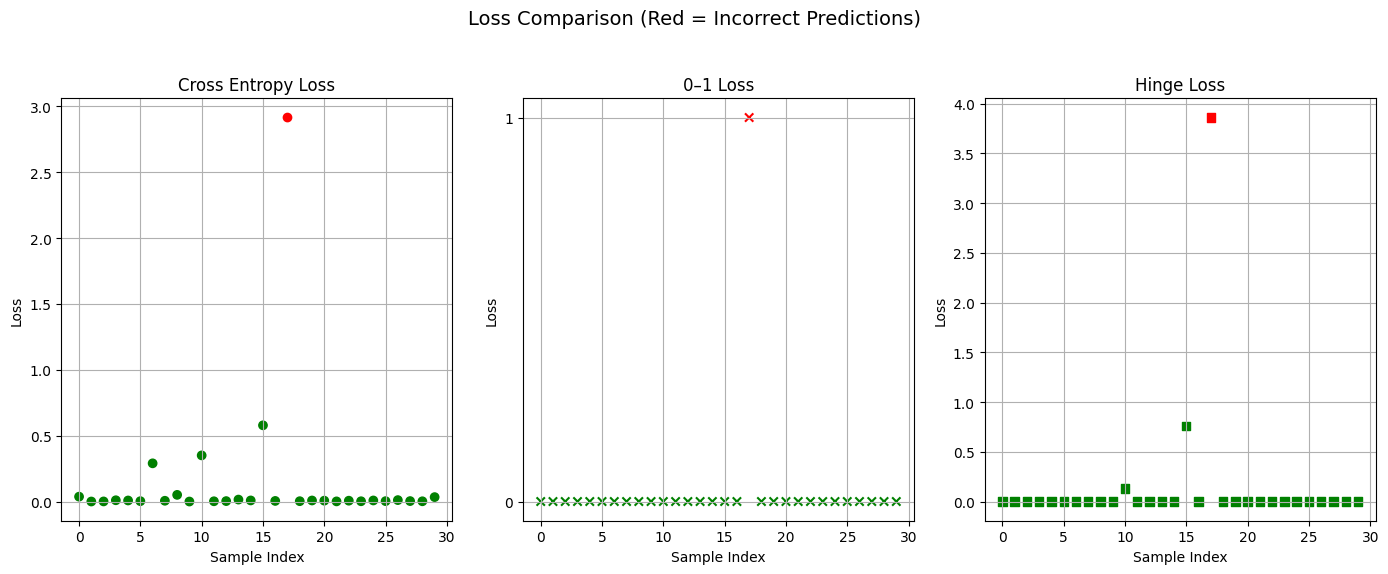

In [36]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

cross_entropy_losses = []
zero_one_losses = []
hinge_losses = []
colors = []

with torch.no_grad():
    for i, (data, target) in enumerate(zip(X_test, y_test)):
        if data.ndim == 1:
            data = data.unsqueeze(0)

        logits = model.forward(data)
        probs = F.softmax(logits, dim=1)

        # Cross-Entropy
        ce_loss = F.cross_entropy(logits, target.unsqueeze(0), reduction='none')
        cross_entropy_losses.append(ce_loss.item())

        # Prediction
        pred_label = torch.argmax(probs, dim=1).item()
        true_label = target.item()

        # 0-1 Loss
        correct = (pred_label == true_label)
        zero_one_losses.append(0 if correct else 1)
        colors.append('green' if correct else 'red')

        # Hinge Loss
        true_class_score = logits[0, target]
        margins = torch.clamp(logits - true_class_score + 1.0, min=0)
        margins[0, target] = 0
        hinge_loss = torch.sum(margins).item()
        hinge_losses.append(hinge_loss)

plt.figure(figsize=(14, 6))

# Cross-Entropy
plt.subplot(1, 3, 1)
plt.scatter(range(len(cross_entropy_losses)), cross_entropy_losses, c=colors, marker='o')
plt.title("Cross Entropy Loss")
plt.xlabel("Sample Index")
plt.ylabel("Loss")
plt.grid(True)

# 0–1 Loss
plt.subplot(1, 3, 2)
plt.scatter(range(len(zero_one_losses)), zero_one_losses, c=colors, marker='x')
plt.title("0–1 Loss")
plt.xlabel("Sample Index")
plt.ylabel("Loss")
plt.yticks([0, 1])
plt.grid(True)

# Hinge Loss
plt.subplot(1, 3, 3)
plt.scatter(range(len(hinge_losses)), hinge_losses, c=colors, marker='s')
plt.title("Hinge Loss")
plt.xlabel("Sample Index")
plt.ylabel("Loss")
plt.grid(True)

plt.suptitle("Loss Comparison (Red = Incorrect Predictions)", fontsize=14)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


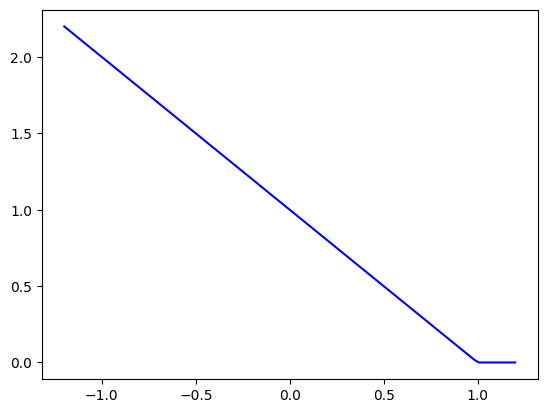

In [37]:
def hinge(r, y):
    return np.max([0, 1 - r * y])

x = np.linspace(-1.2, 1.2, 100)
vert = [hinge(r, 1) for r in x]

plt.plot(x, vert, label='Hinge Loss for y=1', color='blue')
plt.show()

round our predictions to the nearest .1
f(x) = the probability distribution that our model gives us
empirical distribution = true labels for a set of features (round so we get multiple for each)
for calibration: P[Y | f(x) = p] for all rounded predictions p in simplex

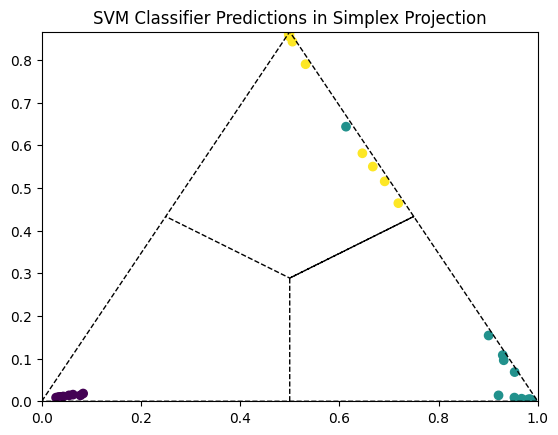

In [38]:
# Create and train the SVC
from sklearn.svm import SVC

def project_to_simplex(data):
    return np.dot(data, np.array([[0,0], [1,0], [ 0.5, np.sqrt(3)/2]]))

svm = SVC(kernel='linear', gamma='auto', C=1, random_state=42, probability=True)
svm.fit(X_train, y_train)
predictions = np.around(svm.predict_proba(X_test), 3)
plt.scatter(project_to_simplex(predictions)[:,0], project_to_simplex(predictions)[:,1], c=y_test)
plt.plot([0.5, 0.5, 0.75, 0.5, 0.25], [0, np.sqrt(3)/6, 0.433, np.sqrt(3)/6, 0.433], 'k--', lw=1)  
plt.plot([0, 0.5, 1, 0], [0, np.sqrt(3)/2, 0, 0], 'k--', lw=1)

plt.title('SVM Classifier Predictions in Simplex Projection')
plt.xlim((0,1))
plt.ylim((0,np.sqrt(3)/2))
plt.show()

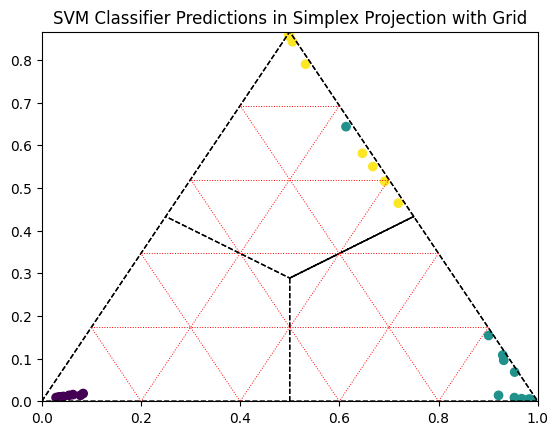

In [41]:
# Create and train the SVC
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt

def project_to_simplex(data):
    return np.dot(data, np.array([[0,0], [1,0], [0.5, np.sqrt(3)/2]]))

svm = SVC(kernel='linear', gamma='auto', C=1, random_state=42, probability=True)
svm.fit(X_train, y_train)
predictions = np.around(svm.predict_proba(X_test), 3)
plt.scatter(project_to_simplex(predictions)[:,0], project_to_simplex(predictions)[:,1], c=y_test)
plt.plot([0.5, 0.5, 0.75, 0.5, 0.25], [0, np.sqrt(3)/6, 0.433, np.sqrt(3)/6, 0.433], 'k--', lw=1)  
plt.plot([0, 0.5, 1, 0], [0, np.sqrt(3)/2, 0, 0], 'k--', lw=1)

# Draw triangle edges
plt.plot([0.5, 0.5, 0.75, 0.5, 0.25], [0, np.sqrt(3)/6, 0.433, np.sqrt(3)/6, 0.433], 'k--', lw=1)  
plt.plot([0, 0.5, 1, 0], [0, np.sqrt(3)/2, 0, 0], 'k--', lw=1)

# Grid lines
n_grid = 5
def draw_line(p1, p2, **kwargs):
    plt.plot([p1[0], p2[0]], [p1[1], p2[1]], **kwargs)

A = np.array([0, 0])
B = np.array([1, 0])
C = np.array([0.5, np.sqrt(3)/2])

for i in range(1, n_grid):
    t = i / n_grid

    # Lines parallel to AB (constant C)
    p1 = (1 - t) * C + t * A
    p2 = (1 - t) * C + t * B
    draw_line(p1, p2, color='red', linestyle=':', linewidth=0.7)

    # Lines parallel to BC (constant A)
    p1 = (1 - t) * A + t * B
    p2 = (1 - t) * A + t * C
    draw_line(p1, p2, color='red', linestyle=':', linewidth=0.7)

    # Lines parallel to AC (constant B)
    p1 = (1 - t) * B + t * C
    p2 = (1 - t) * B + t * A
    draw_line(p1, p2, color='red', linestyle=':', linewidth=0.7)

plt.title('SVM Classifier Predictions in Simplex Projection with Grid')
plt.xlim((0,1))
plt.ylim((0,np.sqrt(3)/2))
plt.show()


In [40]:
#round our predictions to the nearest 0.1
with torch.no_grad():
    for i, data in enumerate(X_test):
        if data.ndim == 1:
            data = data.unsqueeze(0)
        #get the predicted value
        y_val = model.forward(data)
        normalized = torch.nn.functional.softmax(y_val, dim=1)


        #round data (show only first decimal point)
        normalized_np = normalized.detach().cpu().numpy()
        rounded_preds = np.round(normalized_np, 1)
        
        original_input_np = data.cpu().numpy()[0]  # shape: (num_features,)
        rounded_input = np.round(original_input_np)  # round to nearest integer

        print(f'{i+1}.) Input (rounded): {rounded_input}  =>  Prediction (rounded): {rounded_preds}')


1.) Input (rounded): [6. 2. 5. 2.]  =>  Prediction (rounded): [[0. 0. 1.]]
2.) Input (rounded): [6. 3. 6. 2.]  =>  Prediction (rounded): [[0. 0. 1.]]
3.) Input (rounded): [8. 3. 6. 2.]  =>  Prediction (rounded): [[0. 0. 1.]]
4.) Input (rounded): [6. 3. 5. 1.]  =>  Prediction (rounded): [[0. 1. 0.]]
5.) Input (rounded): [7. 3. 6. 2.]  =>  Prediction (rounded): [[0. 0. 1.]]
6.) Input (rounded): [6. 3. 4. 1.]  =>  Prediction (rounded): [[0. 1. 0.]]
7.) Input (rounded): [6. 3. 5. 2.]  =>  Prediction (rounded): [[0.  0.3 0.7]]
8.) Input (rounded): [6. 3. 4. 2.]  =>  Prediction (rounded): [[0. 1. 0.]]
9.) Input (rounded): [6. 3. 5. 2.]  =>  Prediction (rounded): [[0. 0. 1.]]
10.) Input (rounded): [7. 3. 6. 2.]  =>  Prediction (rounded): [[0. 0. 1.]]
11.) Input (rounded): [6. 3. 5. 2.]  =>  Prediction (rounded): [[0.  0.3 0.7]]
12.) Input (rounded): [5. 3. 2. 0.]  =>  Prediction (rounded): [[1. 0. 0.]]
13.) Input (rounded): [4. 3. 1. 0.]  =>  Prediction (rounded): [[1. 0. 0.]]
14.) Input (rou